# Week 3: Calculus (cont'd)

In [1]:
# Load libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Day 2: Differentiation of Multivariable Functions
* So far we worked with functions of a single variable
* In practice, it is much more common to work with functions that have more than one input
* We call these functions multivariable functions

### Example 1: a function of two variables
* Let $x$ and $y$ are two variables which are inputs of the function $f$. We call $x$ and $y$ **independent variables**, and we denote $z = f(x, y)$. We call $z$ a **dependent variable**
* Let define the function $f(x, y) = x^2 + y^2$

In [2]:
# Define variables and the function

x, y = sp.symbols('x y', real=True)
f = sp.Function('f', real=True)

f = x**2 + y**2
f

x**2 + y**2

In [6]:
f.subs({x:2, y:1})

5

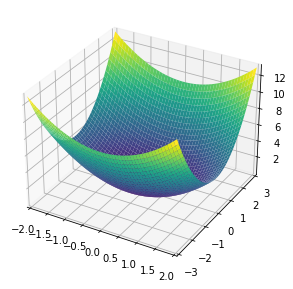

In [7]:
sp.plotting.plot3d(f, (x, -2, 2), (y, -3, 3))

### Example 2
* Define the function:
\begin{equation} g(t_1, t_2, t_3) = \frac{1}{t_1} + \ln t_2 - e^{-t_3^2} \end{equation}

In [9]:
t1, t2, t3 = sp.symbols('t1 t2 t3', real=True)
g = sp.Function('g', real=True)

g = 1/t1 + sp.log(t2) - sp.exp(-t3**2)
g

log(t2) - exp(-t3**2) + 1/t1

### Differentiation of multivariable functions
* With multivariable functions there is no single derivative like in the case of a single variable functions
* Instead, there is a **partial derivative** for each and every one of the independent variables
* For example, if the function is $f(x, y)$, which has two independent variables, then we have two partial derivatives
    * Partial derivative with respect to $x$, labeled as $f_x$ or $\frac{\partial f}{\partial x}$
    * Partial derivative with respect to $y$, labeled as $f_y$ or $\frac{\partial f}{\partial y}$

### Example 1a
* Calculate the partial derivatives of $f(x, y)$ defined in **Example 1**

In [11]:
# Differentiate with sympy.diff()

f_x = f.diff(x)
f_y = f.diff(y)
f_x, f_y

(2*x, 2*y)

### Example 2a
* Calculate the partial derivatives of $g(t_1, t_2, t_3)$ defined in **Example 2**

In [12]:
# Differentiate with sympy.diff()

g_t1 = g.diff(t1)
g_t2 = g.diff(t2)
g_t3 = g.diff(t3)
g_t1, g_t2, g_t3

(-1/t1**2, 1/t2, 2*t3*exp(-t3**2))

### Example 3
* Calculate the partial derivatives $h_x$ and $h_y$ of
\begin{equation}
h(x, y) = \sqrt{x^2 + y^2}
\end{equation}
* Then evaluate $h_x (-1, 1)$ and $h_y (0, -1)$

In [13]:
# Define the function

h = sp.Function('h', real=True)
h = sp.sqrt(x**2 + y**2)
h

sqrt(x**2 + y**2)

In [15]:
h_x = h.diff(x)
h_y = h.diff(y)
h_x, h_y

(x/sqrt(x**2 + y**2), y/sqrt(x**2 + y**2))

In [16]:
h_x.subs({x: -1, y: 1}).n()

-0.707106781186548

In [17]:
h_y.subs({x: 0, y: -1}).n()

-1.00000000000000

### The Gradient of a function
* Let $f$ be a multivariable function. The **gradient** of $f$, labeled $\nabla f$ is a vector whose components are the partial derivatives of the function. The gradient has as many components as the function has variables
* For example: if $f(x, y)$ is a function, then its gradient is given by:
\begin{equation}
\nabla f(x, y) = \left( f_x, f_y \right)
\end{equation}
If $g(x, y, z, w)$ is a function, then its gradient is given by:
\begin{equation}
\nabla g(x, y, z, w) = \left( g_x, g_y, g_z, g_w \right)
\end{equation}
* For us the gradient will play a crucial role in extending the *Gradient Descent Method* to multivariable functions

### Example 4
* Find the gradient $\nabla f(x, y)$ of the function $f(x, y) = e^x \cos y$. Then evaluate $\nabla f(2, 0)$

In [22]:
# Define the function

f = sp.exp(x) * sp.cos(y)

# Get derivatives, form gradient

f_x = f.diff(x)
f_y = f.diff(y)

grad_f = (f_x, f_y)

# Evaluate the gradient

dic = {x: 2, y: 0}

eval_grad_f = (f_x.subs(dic).n(), f_y.subs(dic).n())
eval_grad_f

(7.38905609893065, 0)

### Example 5
* Find the gradient $\nabla g(x, y, z)$ of the function $g(x, y, z) = e^{x^2 + 2y - z^3}$. Then evaluate $\nabla g(-1, 1, 0)$

In [25]:
# Define function

x, y, z = sp.symbols('x y z', real=True)

g = sp.exp(x**2+2*y-z**3)

# Get derivatives, form gradient

g_x = g.diff(x)
g_y = g.diff(y)
g_z = g.diff(z)

grad_g = (g_x, g_y, g_z)

# Evaluate the gradient
dic = {x: -1, y: 1, z: 0}

eval_grad_g = (g_x.subs(dic).n(), g_y.subs(dic).n(), g_z.subs(dic).n())
eval_grad_g

(-40.1710738463753, 40.1710738463753, 0)

In [ ]:
# define gradient in numpy



### Higer order derivatives
* Similar as in the case of a single variable functions, we can perform multiple consecutive (partial) differentiations
* What is different in this case is that there are multiple possibilities for performing the differentiation process: every partial derivative can be differentiated with respect to all independent variables
* For example, let $f(x, y)$ be a two-variable function. The **first partial derivatives** are $f_x (x, y)$ and $f_y (x, y)$. Differentiating these, we get the **second partial derivatives**. From $f_x$, we get $f_{xx}(x, y)$ and $f_{xy}(x, y)$, while from $f_y$ we get $f_{yx}(x, y)$ and $f_{yy}(x, y)$.

### Example 6
* Calculate all second partial derivatives of the function $f(x, y) = x^3 + 2x^2 y + y^2$

In [ ]:
# Define the function


# First partial derivatives



# Second partial derivatives



# Printing the derivatives


### Example 7
* Calculate all second partial derivatives of the funciton $g(x, y) = -4x^3 - 3x^2y^3 + 2y^2$

In [ ]:
# Define the function



# First partial derivatives



# Second partial derivatives



# Printing the derivatives


### Application: finding min and max of multivariable functions
* Finding minima and maxima mostly follows the process we outlined for the single variable case
* First, calculate all the first partial derivatives of the function. Next, set them equal to zero and solve the system that consists of these equations - one equation for every partial derivative, for example
\begin{equation}\left\{
\begin{array}{rcl}
f_x &=& 0\\
f_y &=& 0
\end{array}\right.
\end{equation}
* The solutions of this system are the critical points
* Finally, find the second partial derivatives, and test whether a critical point is a **local minimum**, a **local maximum**, a **saddle point** or neither of the three
* We will illustrate this only for functions of two variables

### Example 8 (part 1)
* Step 1: find the critical points of the function $f(x, y) = 9xy -x^3 - y^3 - 6$

In [ ]:
# Define the function

f = 9*x*y - x**3 - y**3 - 6


# First partial derivatives

f_x = f.diff(x)
f_y = f.diff(y)

# Set the equations


# Solve the system


# State the critical points


* Once we have identified a critical point $(x^*, y^*)$, we need to establish if it is an extremal point, and if it is -- then whether it is a minimum or a maximum point. To do this we need the second partial derivatives
* We calculate the quantity $d$, given by:
\begin{equation}
d = f_{xx}(x^*, y^*) \cdot f_{yy}(x^*, y^*) - \big[ f_{xy}(x^*, y^*) \big]^2
\end{equation}
* We based on the value of $d$ and of $f_{xx}(x^*, y^*)$ we can conclude:
    * If $d > 0$ and $f_{xx}(x^*, y^*) > 0$, then the point $(x^*, y^*)$ is a **local minimum**
    * If $d > 0$ and $f_{xx}(x^*, y^*) < 0$, then the point $(x^*, y^*)$ is a **local maximum**
    * If $d < 0$, then the point $(x^*, y^*)$ is a **saddle point** (think: Pringles)
    * If $d = 0$, the test is **inconclusive**

### Example 8 (part 2)
* Determine the nature of the critical points of $f(x, y) = 9xy -x^3 - y^3 - 6$

In [ ]:
# Second partial derivatives


# Working with the first critical point


# Working with the second critical point


### Practice example
* Find the extremal points of the function $g(x, y) = 2xy + 1 - \frac{1}{2}\left(x^4 + y^4\right)$

In [ ]:
# Define the function



# Partial derivatives



# Find critical points



# Establishing the nature of the critical points
